In [2]:
# Import the required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport

In [4]:
# Load the csv files and store them as dataframes.
df1 = pd.read_csv('dim_date.csv')
df2 = pd.read_csv('dim_claims.csv')
df3 = pd.read_csv('dim_pa.csv')
df4 = pd.read_csv('bridge.csv')

In [5]:
# Merge the dim_date and the dim_claims using the bridge.
df5 = pd.merge(df1, df4)
df6 = pd.merge(df5, df2)

# We're only interested in claims that have a rejection code and therefore require an ePA.
df7 = df6[~df6['reject_code'].isna()] 

In [6]:
# Calculate the volume, or number of claims, for each drug on a given day.
# Store the day's ID and volume as a list of tuples to be converted to a dataframe.
vol_A = []
for i in df7.dim_date_id.unique():
    j = len(df7[(df7['dim_date_id']==i) & (df7['drug']=='A')])
    vol_A.append((i, j))

vol_B = []
for i in df7.dim_date_id.unique():
    j = len(df7[(df7['dim_date_id']==i) & (df7['drug']=='B')])
    vol_B.append((i, j))

vol_C = []
for i in df7.dim_date_id.unique():
    j = len(df7[(df7['dim_date_id']==i) & (df7['drug']=='C')])
    vol_C.append((i, j))

In [7]:
# Convert the volume data for each drug to dataframes.
Vol_A = pd.DataFrame(vol_A, columns =['dim_date_id', 'volume_A'])
Vol_B = pd.DataFrame(vol_B, columns =['dim_date_id', 'volume_B'])
Vol_C = pd.DataFrame(vol_C, columns =['dim_date_id', 'volume_C'])

In [8]:
# Merge the volume data to the date data.
df8 = pd.merge(df1, Vol_A)
df9 = pd.merge(df8, Vol_B)
df10 = pd.merge(df9, Vol_C)

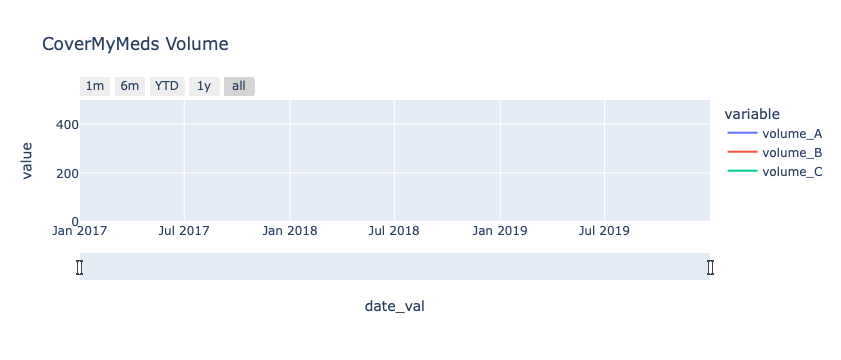

In [17]:
fig = px.line(df10, x='date_val', y=['volume_A','volume_B','volume_C'], title='CoverMyMeds Volume')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()